In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [208]:
def harker_diagram_plotter(path_to_csv, dataset_name):
    """
    This function takes in chemical oxide data in weight percent
    and outputs Harker diagrams with SiO2 on the x-axis and other oxides on the
    y-axis. The end result is a 4x2 Harker plots with sublpots. 
    
    """
    ## Open the CSV file
    raw_data = pd.read_csv(path_to_csv)
    raw_data.head()

    ## Extract data for each oxide from csv:
    oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O']
    print('Oxide count: ', len(oxides))

    oxide_data = {}

    for oxide in oxides:
        if oxide in raw_data:
            oxide_data[oxide] = raw_data[oxide]

        else:
            print(f"Warning: {oxide} not found in the DataFrame columns.")


    ## Create a Numpy array for each oxide
    oxide_arrays = {oxide: oxide_data.to_numpy() for oxide, oxide_data in oxide_data.items()}
    oxides_df = pd.DataFrame(oxide_arrays)

    ## Isolate SiO2 and non-SiO2 oxides
    oxides_df_nosio2 = oxides_df.drop(columns=oxides_df.columns[0])
    SiO2 = oxides_df["SiO2"]
    ######### PLOT GENERATION #########
    ####################################
    
    ## Create the plot
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11,24))
    axes = axes.flatten()

    # For each oxide in the amended oxides
    for n, oxide in enumerate(oxides_df_nosio2):
        axes[n].scatter(SiO2, oxide_arrays[oxide])
        axes[n].set_title(f'SiO2 vs. {oxide}')
        axes[n].set_xlabel('SiO2 (%)')
        axes[n].set_ylabel(f'{oxide} (%)')
        axes[n].set_box_aspect(1)  # Set the aspect ratio to be equal (square)

    ## Title and adjustments for master plot
    fig.suptitle(f'{dataset_name} Harker diagrams', fontsize=20)
    plt.subplots_adjust(top=1.2)
    plt.tight_layout()
    
    return 


In [198]:
seguam_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/seguam.csv'
thingmuli_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/thingmuli.csv'
newberry_tnc_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/newberry_ca.csv'
newberry_ca_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/newberry_tnc.csv'
augustine_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/augustine.csv'
hcb_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/hat_creek_basalt.csv'

Oxide count:  9
Oxide count:  9
Oxide count:  9
Oxide count:  9
Oxide count:  9
Oxide count:  9


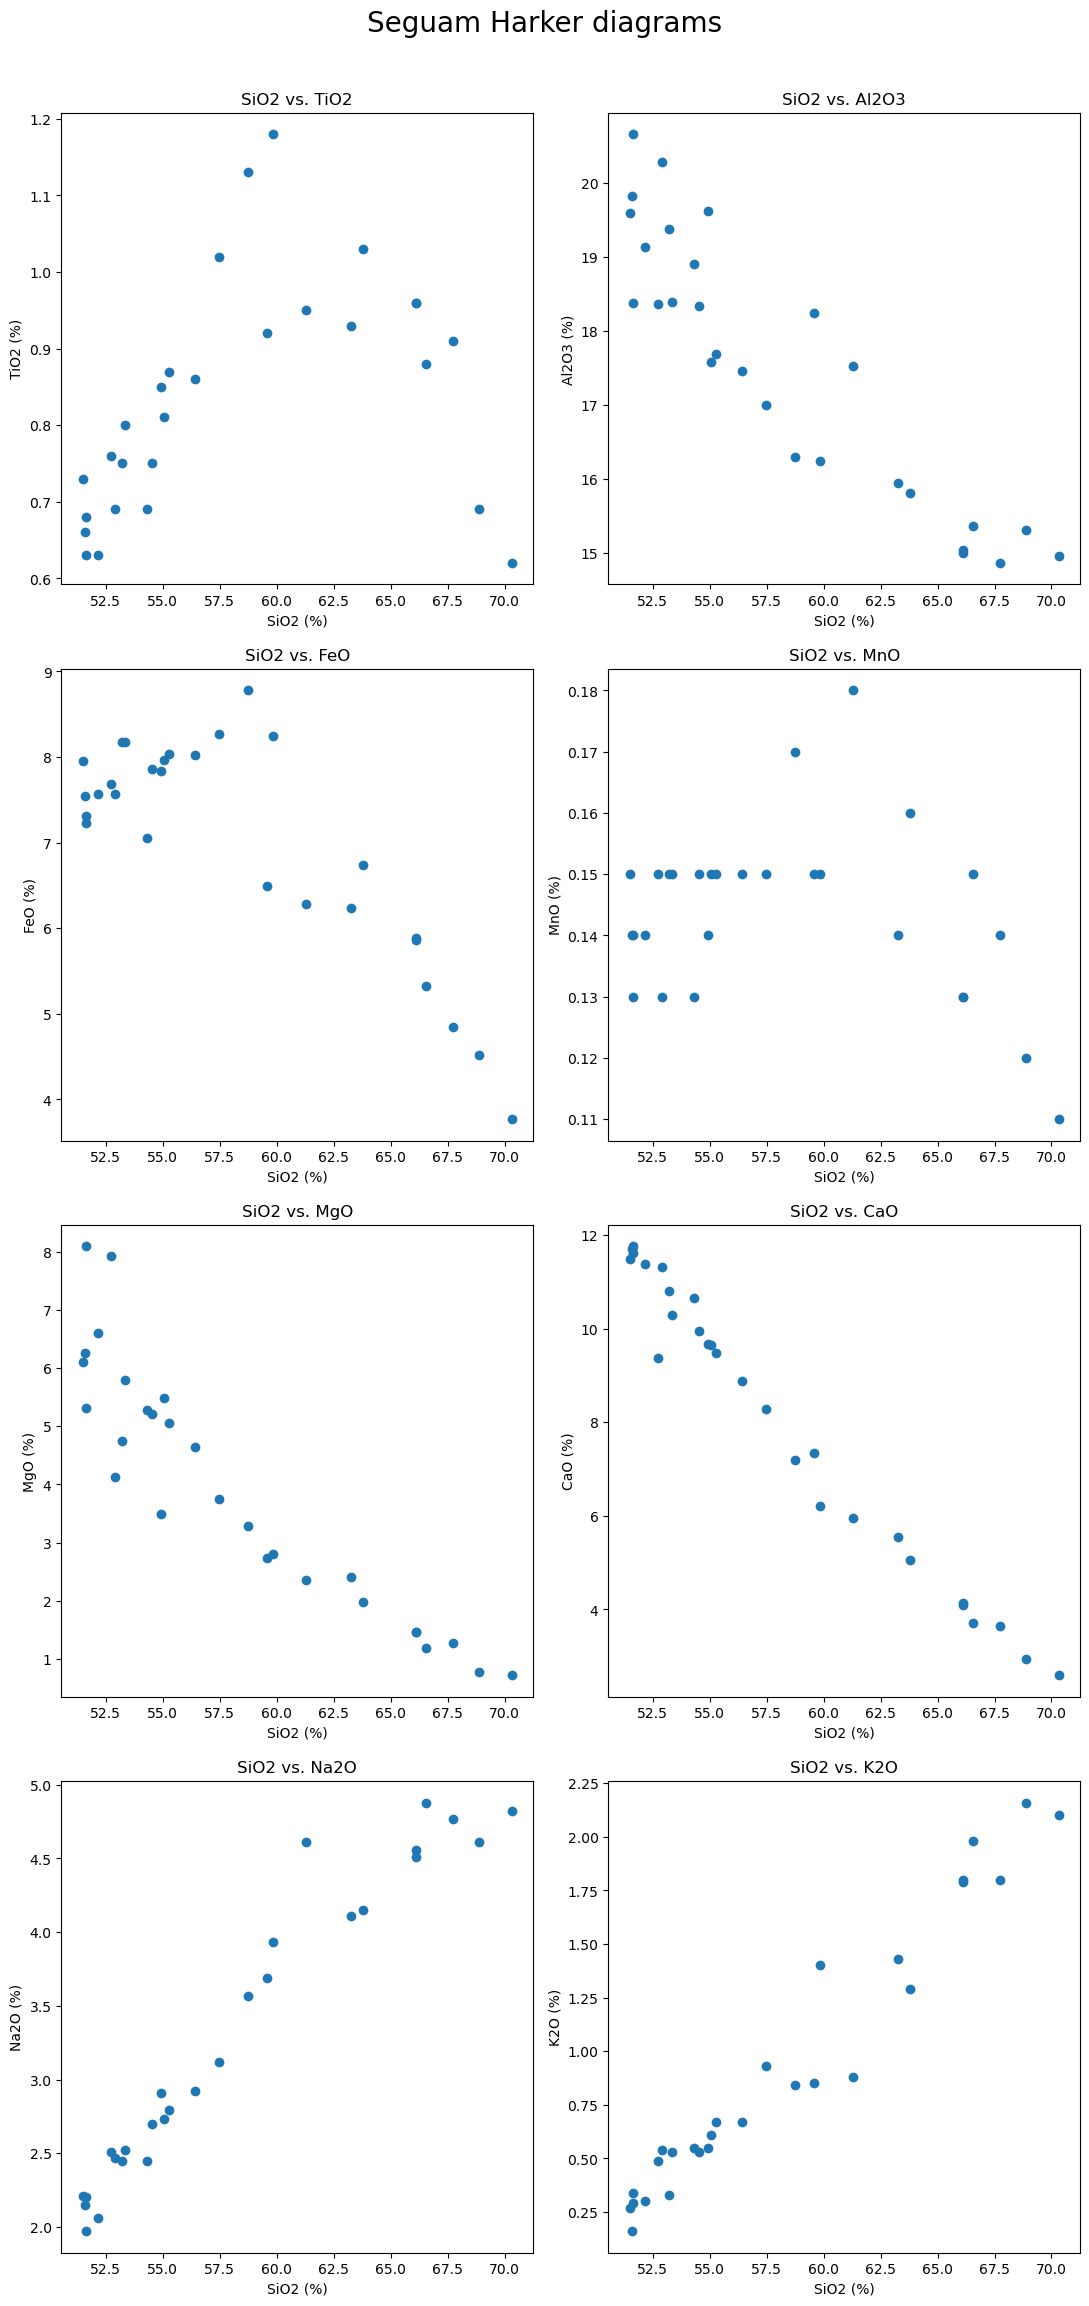

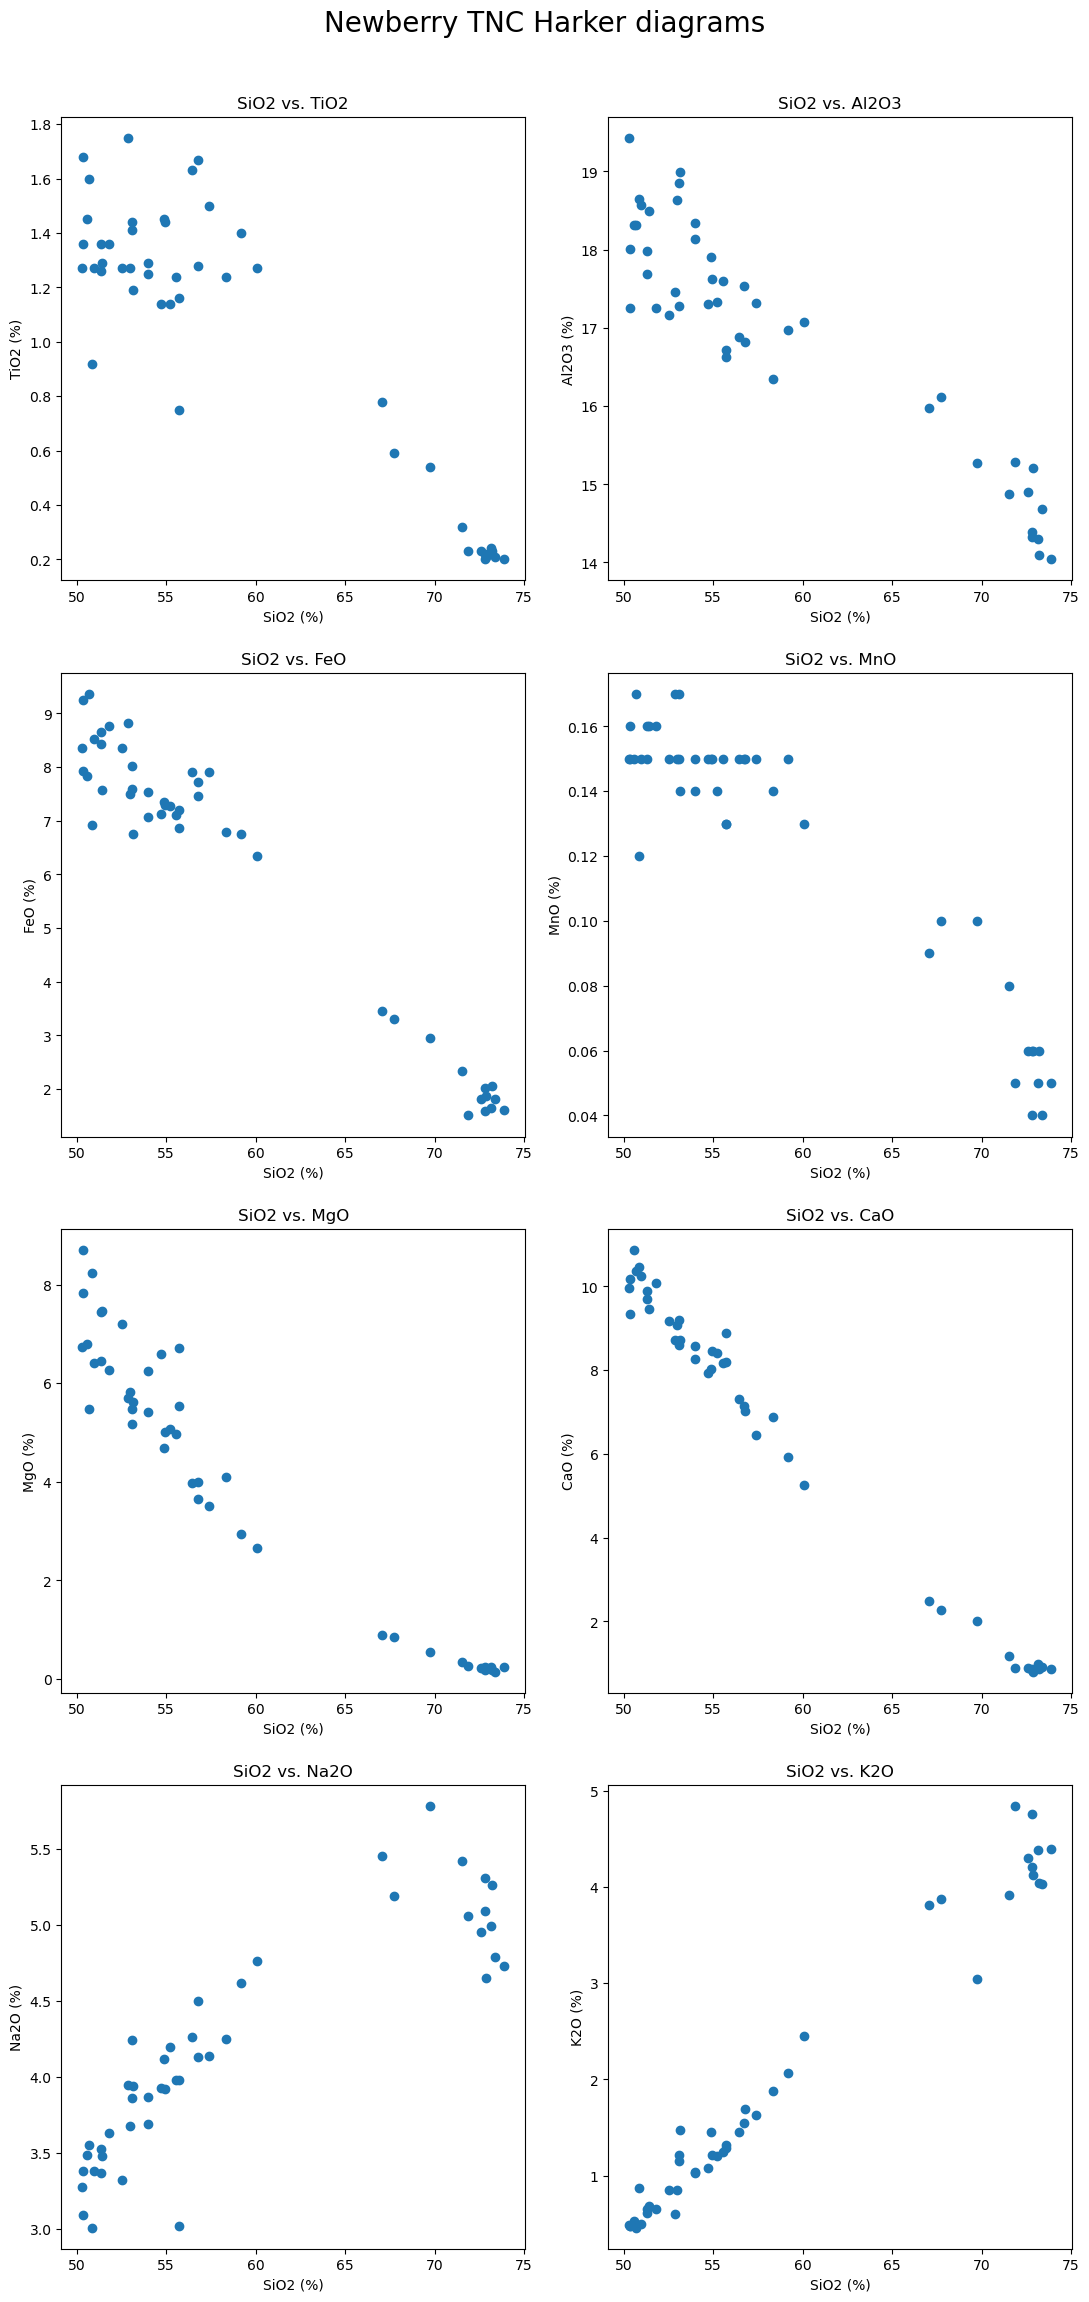

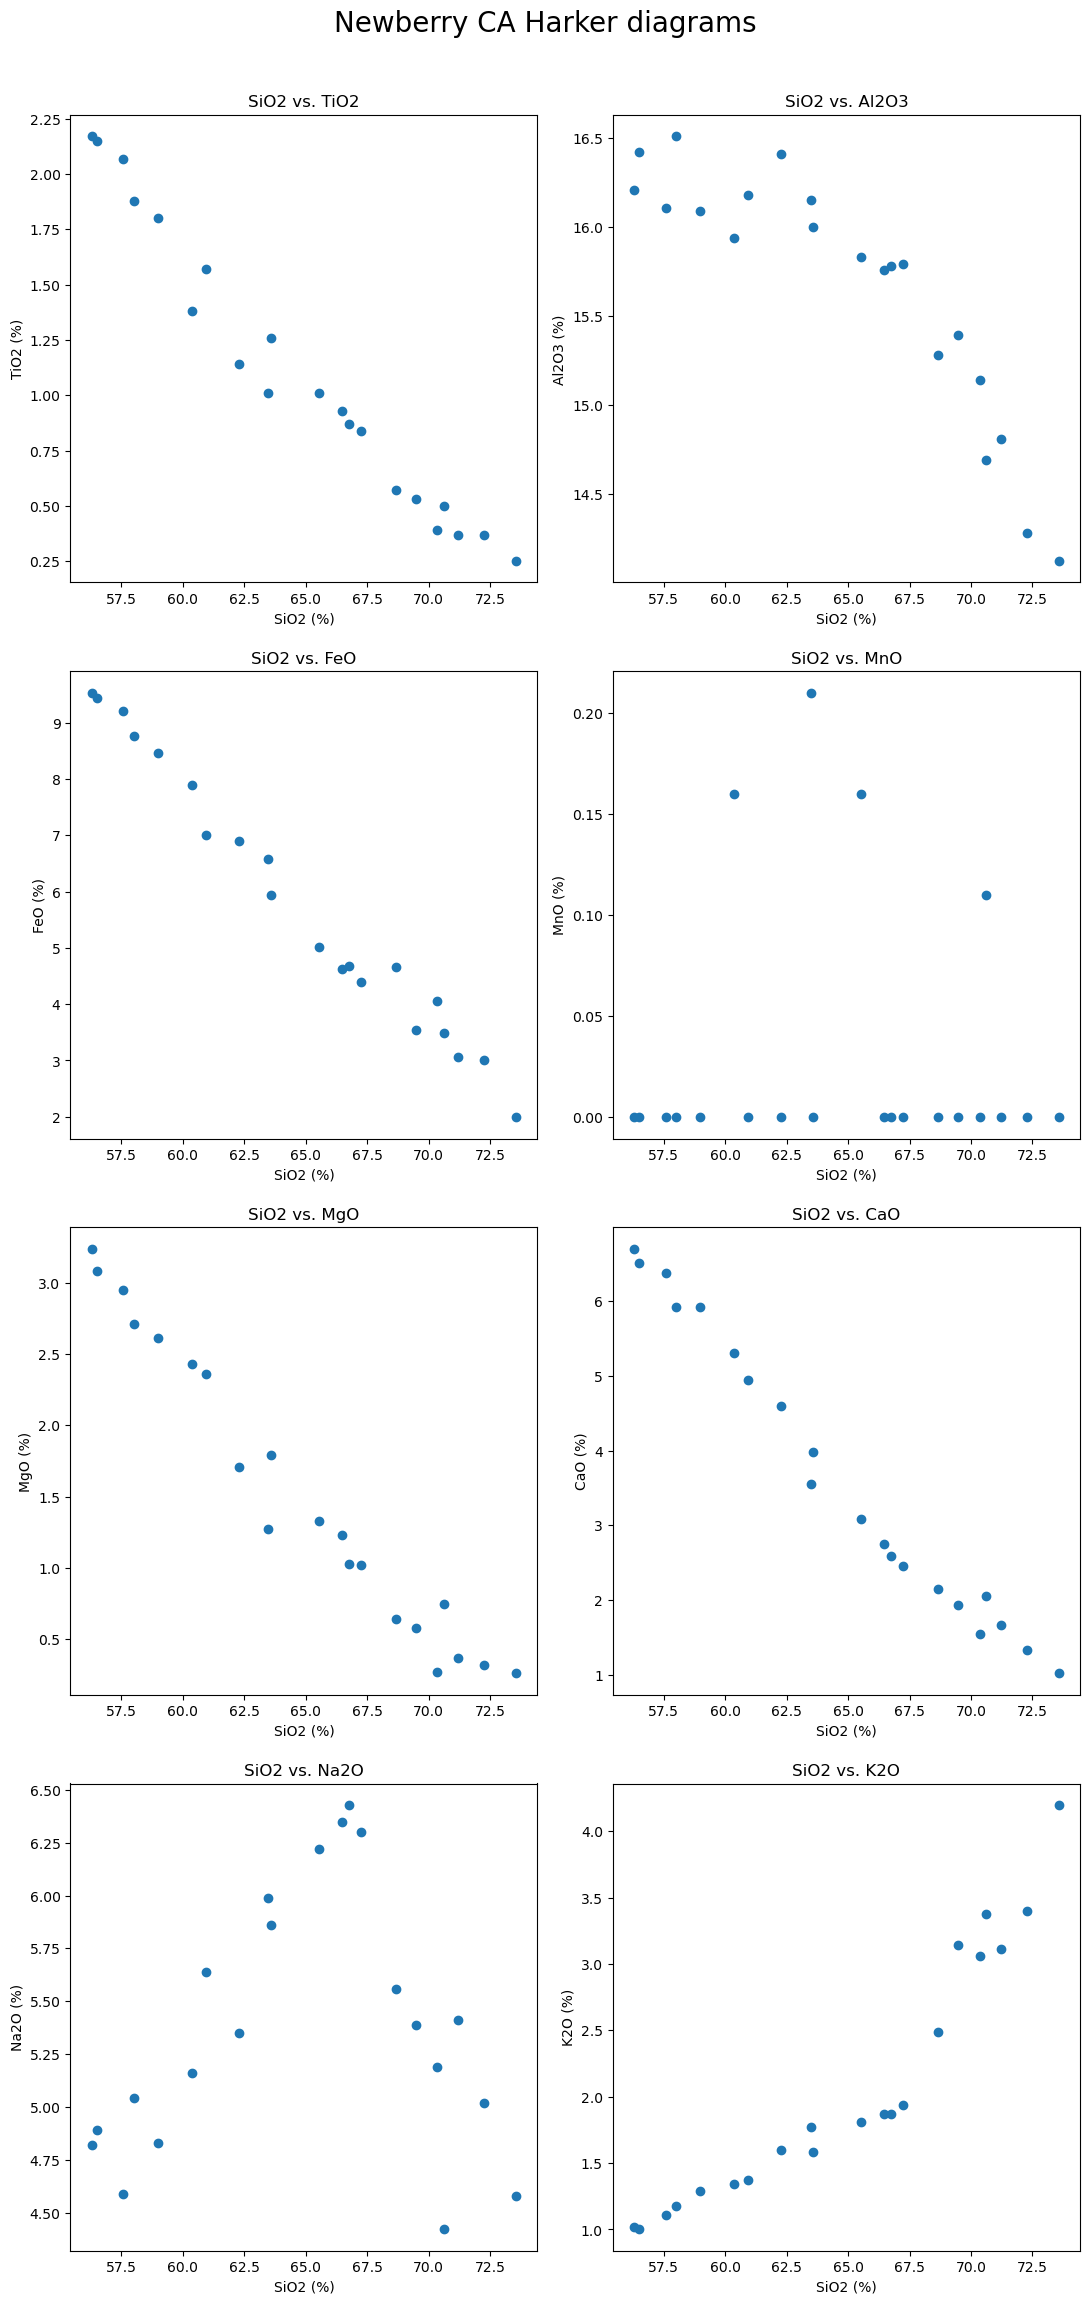

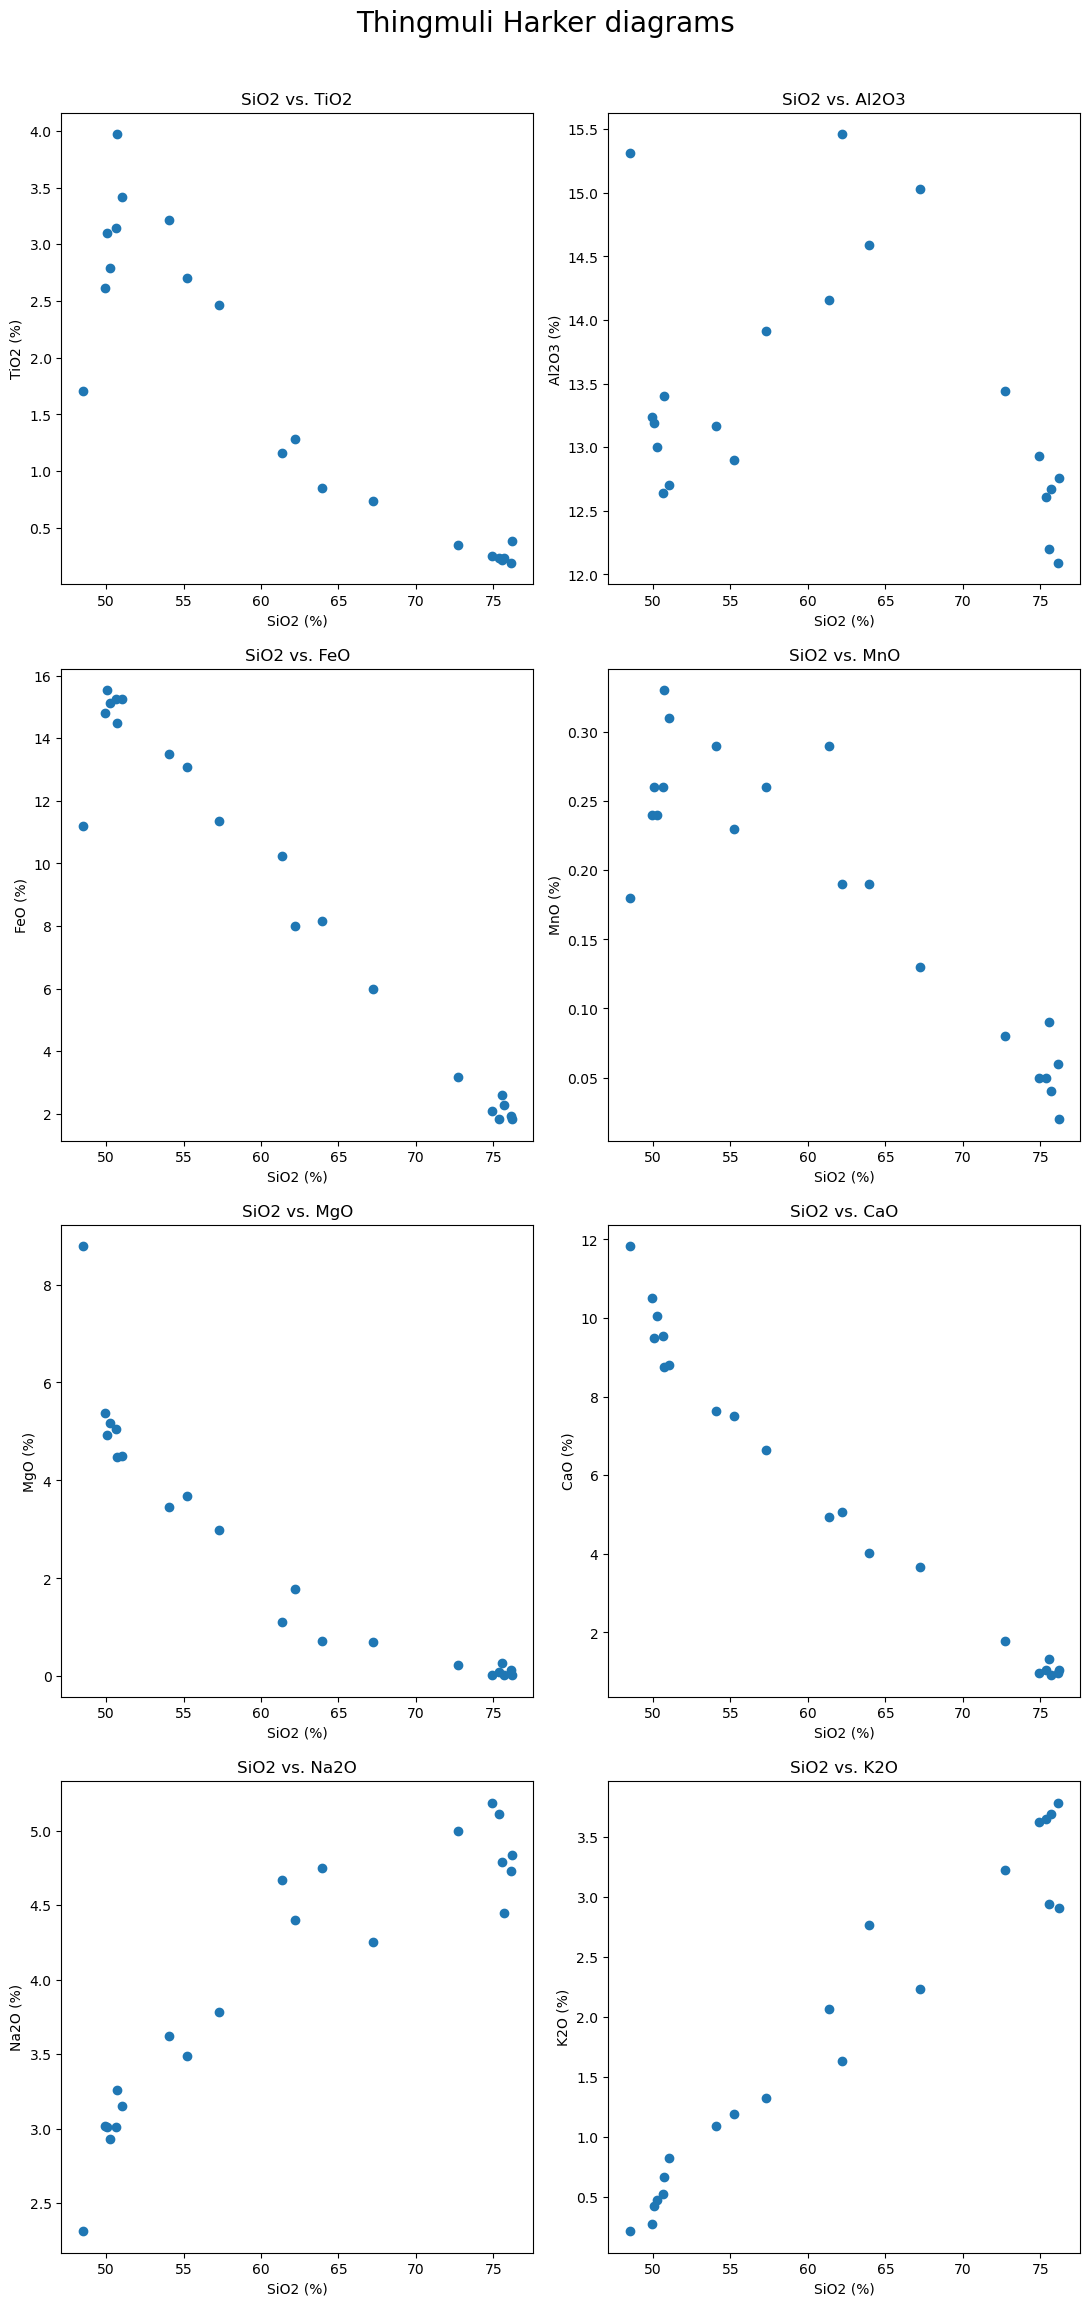

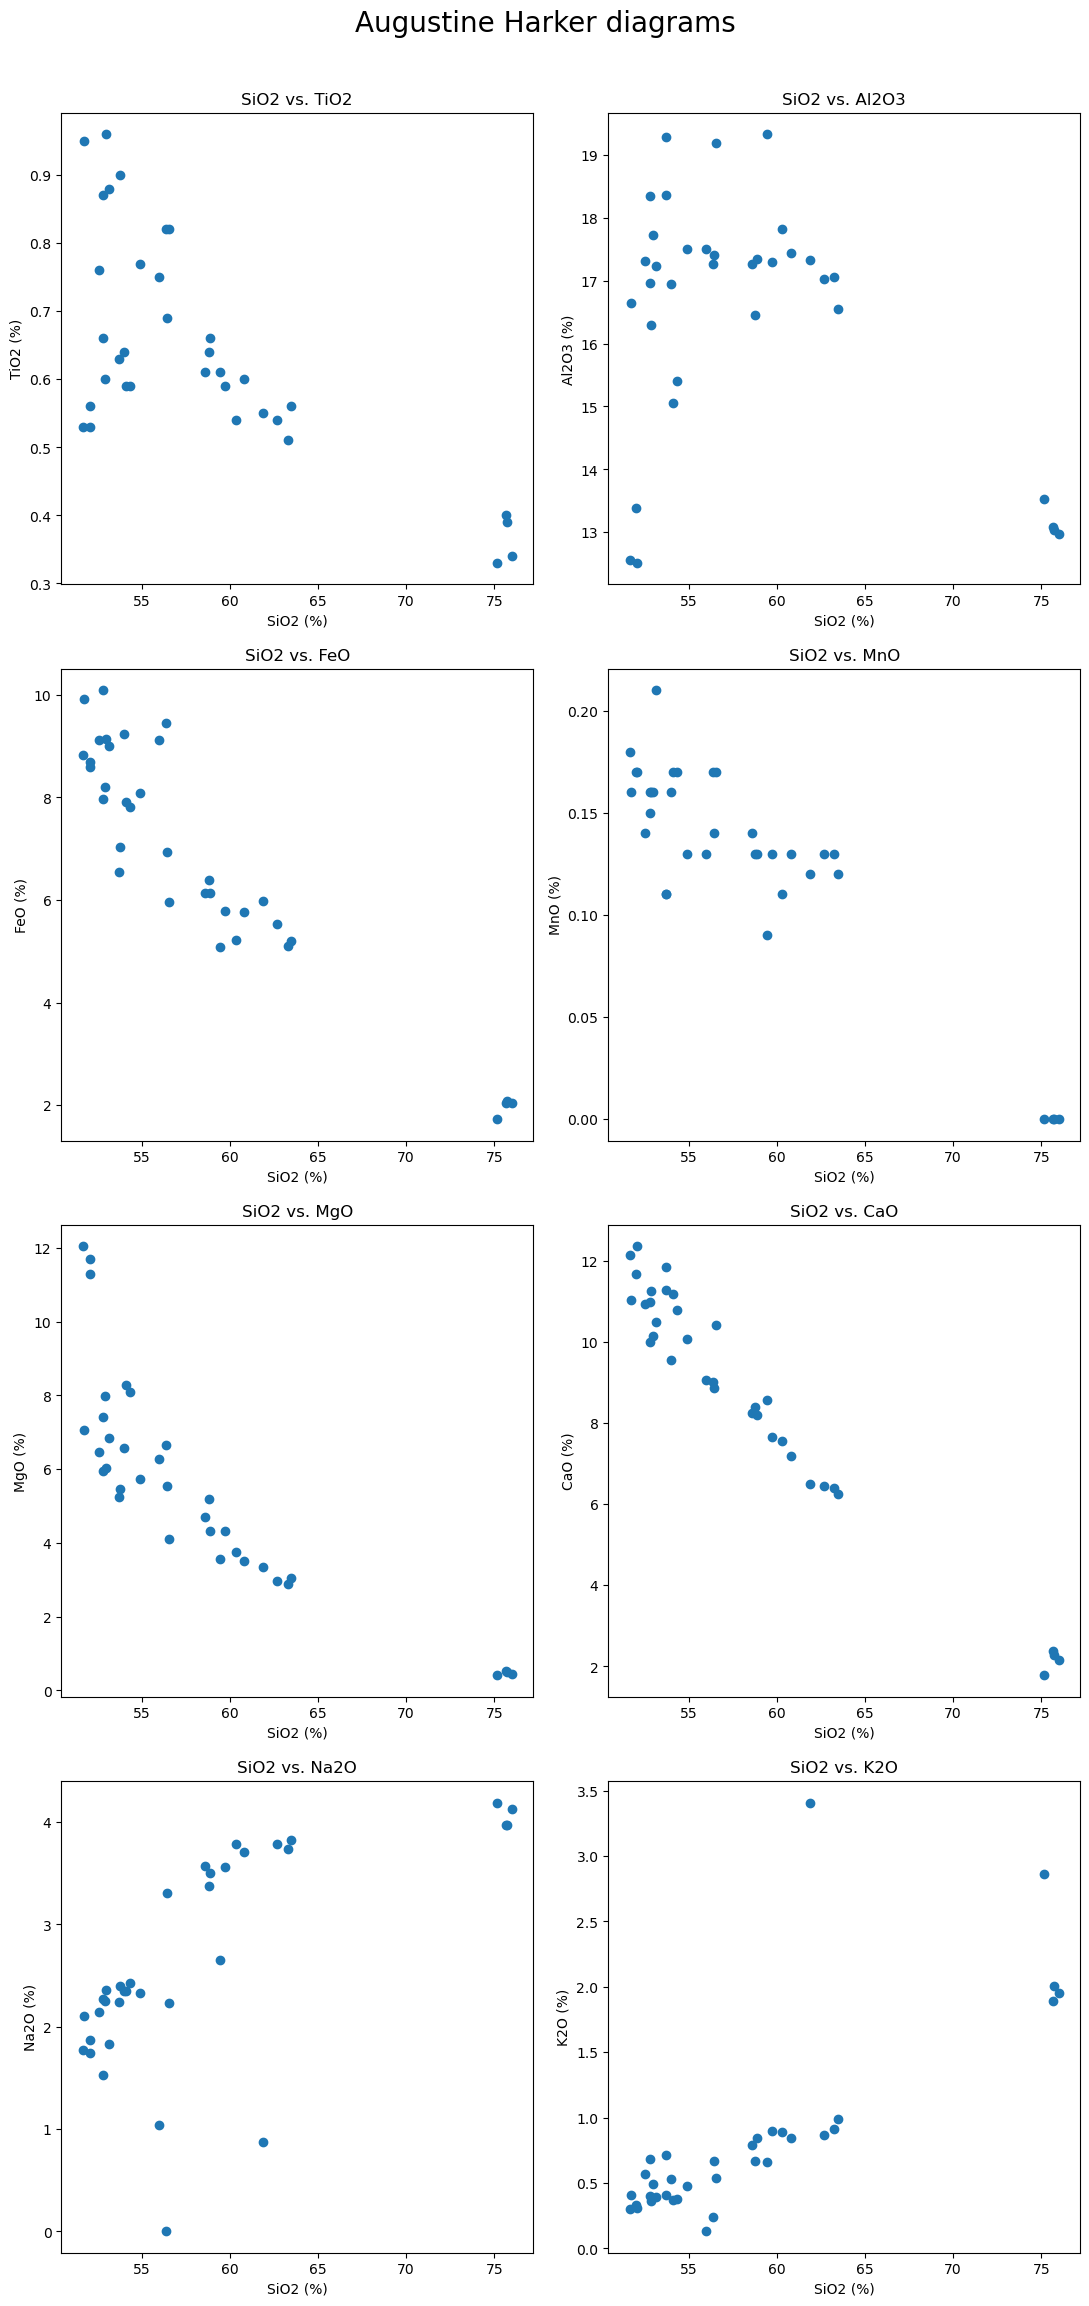

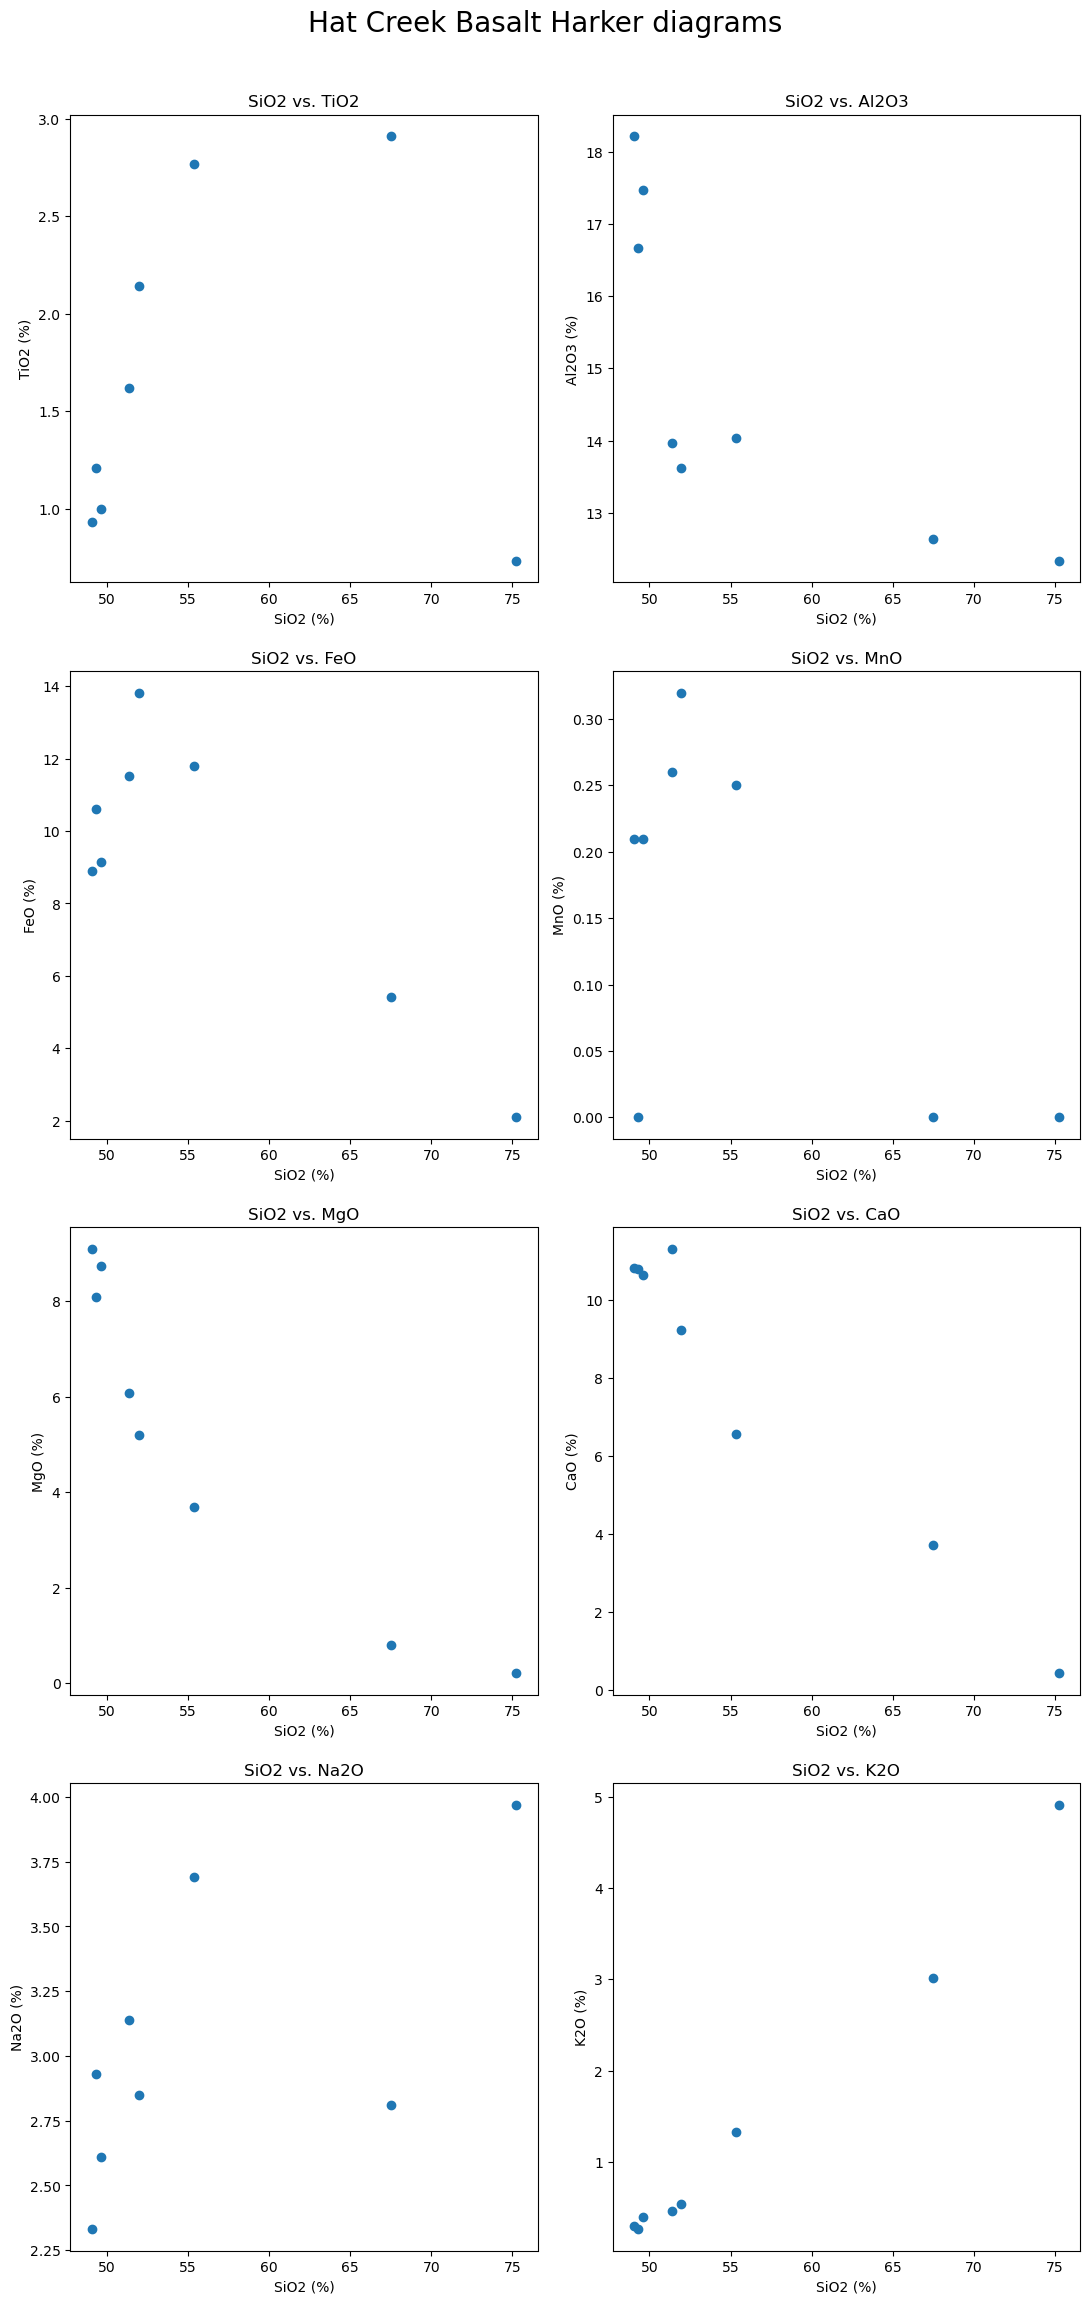

In [210]:
harker_diagram_plotter(seguam_path, 'Seguam')
harker_diagram_plotter(newberry_tnc_path, 'Newberry TNC')
harker_diagram_plotter(newberry_ca_path, 'Newberry CA')
harker_diagram_plotter(thingmuli_path, 'Thingmuli')
harker_diagram_plotter(augustine_path, 'Augustine')
harker_diagram_plotter(hcb_path, 'Hat Creek Basalt')